In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
weather = pd.read_csv('./data/2000-01~2021-11m.csv', encoding='cp949') #불러오기

print(weather.head(263))
print(weather.dtypes)

      지점 지점명       일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  최고기온(°C)  최저기온(°C)  \
0    108  서울  2000-01      -2.1         1.7        -5.7       9.9     -12.1   
1    108  서울  2000-02      -1.7         2.6        -5.8       7.5     -11.6   
2    108  서울  2000-03       6.3        11.4         1.7      18.9      -4.8   
3    108  서울  2000-04      11.9        16.9         7.3      23.5       1.8   
4    108  서울  2000-05      17.5        22.7        12.9      30.5       7.9   
..   ...  ..      ...       ...         ...         ...       ...       ...   
258  108  서울  2021-07      28.1        32.2        24.6      36.5      19.6   
259  108  서울  2021-08      25.9        29.7        22.8      33.7      18.1   
260  108  서울  2021-09      22.6        26.9        18.8      30.3      16.0   
261  108  서울  2021-10      15.6        20.5        11.6      28.8       1.3   
262  108  서울  2021-11       8.2        13.1         4.0      21.3      -3.7   

     최고기온 나타난날(yyyymmdd)  최저기온 나타난날(yyyymmdd)  
0  

In [3]:
weather['date'] = pd.to_datetime(weather['일시'], format='%Y-%m')
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month

train_year = weather.loc[:257,['일시','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)','month','year']]
test_year = weather.loc[258:,['일시','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)','month','year']]

In [4]:
print(train_year.head(263))
print(train_year.dtypes)

          일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  month  year
0    2000-01      -2.1         1.7        -5.7      1  2000
1    2000-02      -1.7         2.6        -5.8      2  2000
2    2000-03       6.3        11.4         1.7      3  2000
3    2000-04      11.9        16.9         7.3      4  2000
4    2000-05      17.5        22.7        12.9      5  2000
..       ...       ...         ...         ...    ...   ...
253  2021-02       2.7         7.9        -2.2      2  2021
254  2021-03       9.0        14.8         4.3      3  2021
255  2021-04      14.2        19.5         9.5      4  2021
256  2021-05      17.1        21.9        12.8      5  2021
257  2021-06      22.8        27.6        18.9      6  2021

[258 rows x 6 columns]
일시             object
평균기온(°C)      float64
평균최고기온(°C)    float64
평균최저기온(°C)    float64
month           int64
year            int64
dtype: object


In [5]:
print(test_year.head(5))

          일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  month  year
258  2021-07      28.1        32.2        24.6      7  2021
259  2021-08      25.9        29.7        22.8      8  2021
260  2021-09      22.6        26.9        18.8      9  2021
261  2021-10      15.6        20.5        11.6     10  2021
262  2021-11       8.2        13.1         4.0     11  2021


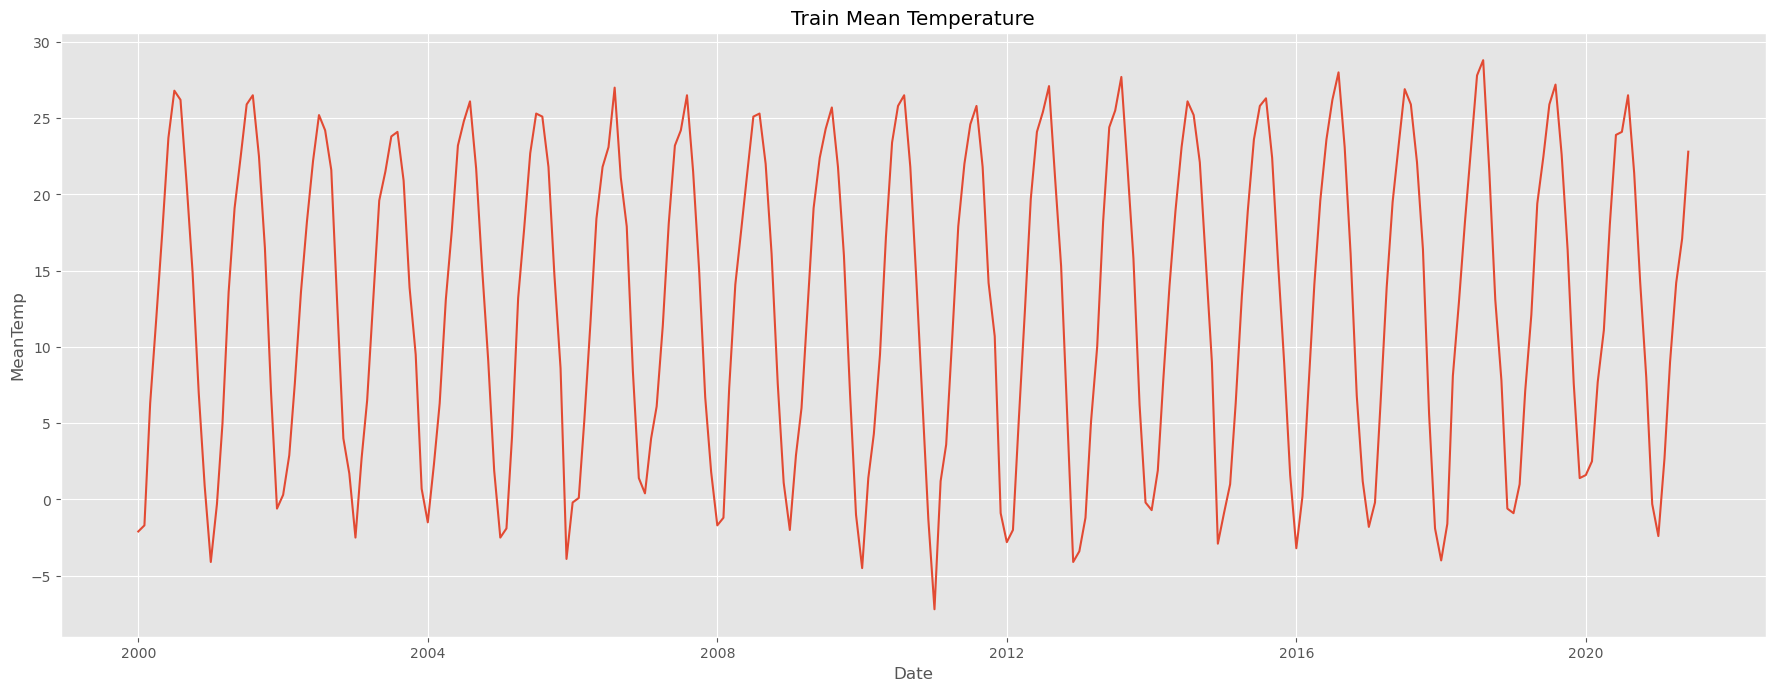

In [6]:
#train 데이터로 확인

train_year["trainDate"] = pd.to_datetime(train_year["일시"], format='%Y-%m')
train_year["MeanTemp"] = train_year['평균기온(°C)']
train_year["MaxTemp"] = train_year['평균최고기온(°C)']
train_year["MinTemp"] = train_year['평균최저기온(°C)']


test_year["trainDate"] = pd.to_datetime(test_year["일시"], format='%Y-%m')
test_year["MeanTemp"] = test_year['평균기온(°C)']
test_year["MaxTemp"] = test_year['평균최고기온(°C)']
test_year["MinTemp"] = test_year['평균최저기온(°C)']


plt.figure(figsize=(22, 8), dpi=100)
plt.plot(train_year.trainDate, train_year.MeanTemp)
plt.title("Train Mean Temperature")
plt.xlabel("Date")
plt.ylabel("MeanTemp")
plt.show()

In [7]:
timeSeries = train_year.loc[:,["trainDate","MeanTemp"]]
timeSeries.index = timeSeries.trainDate
ts = timeSeries.drop("trainDate",axis=1)

print(ts)

            MeanTemp
trainDate           
2000-01-01      -2.1
2000-02-01      -1.7
2000-03-01       6.3
2000-04-01      11.9
2000-05-01      17.5
...              ...
2021-02-01       2.7
2021-03-01       9.0
2021-04-01      14.2
2021-05-01      17.1
2021-06-01      22.8

[258 rows x 1 columns]


In [8]:
timeSeries_test = test_year.loc[:,["trainDate","MeanTemp"]]
timeSeries_test.index = timeSeries_test.trainDate
ts_test = timeSeries_test.drop("trainDate",axis=1)

print(ts_test)

            MeanTemp
trainDate           
2021-07-01      28.1
2021-08-01      25.9
2021-09-01      22.6
2021-10-01      15.6
2021-11-01       8.2


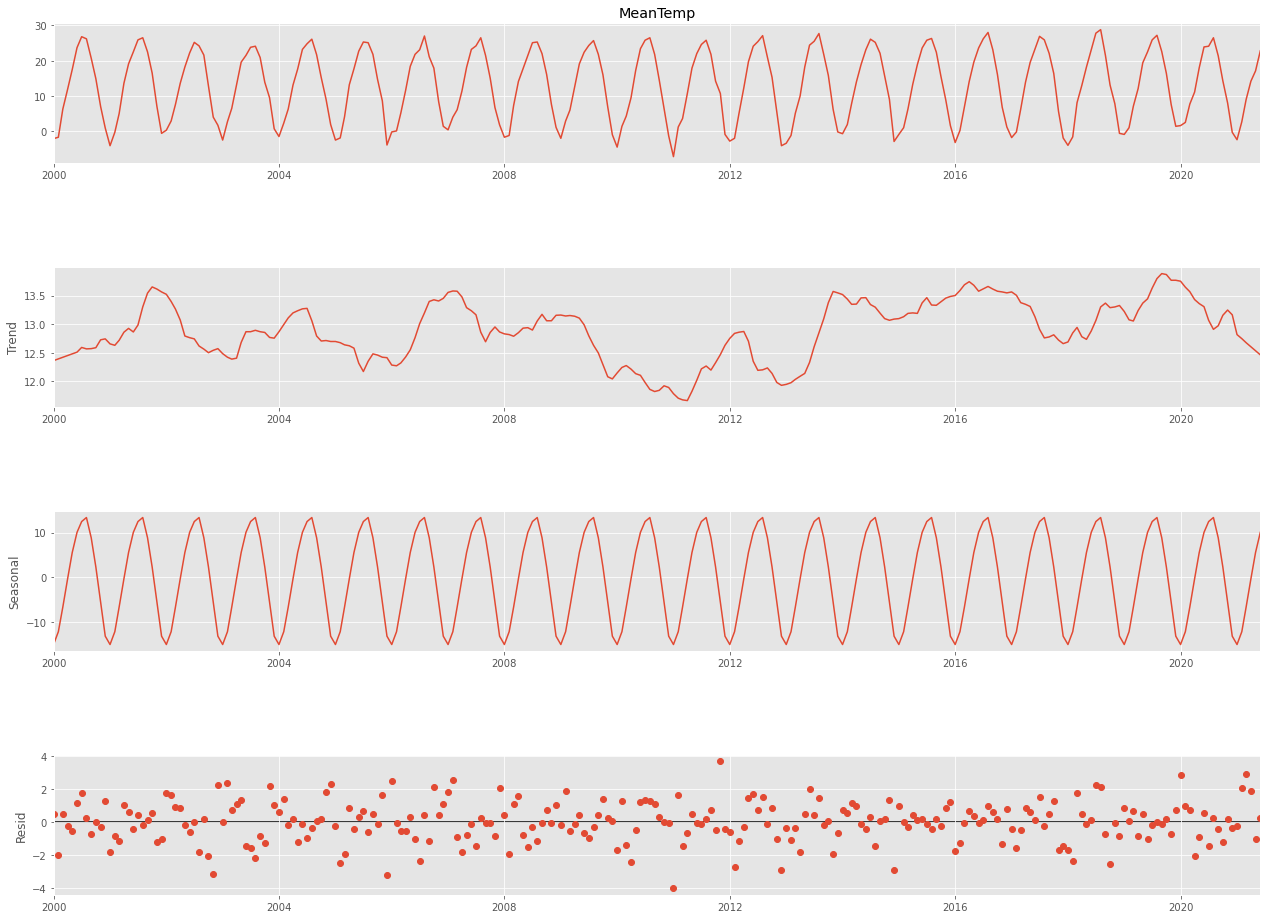

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['MeanTemp'], model='additive', period=12, extrapolate_trend='freq')
#result = seasonal_decompose(ts['MeanTemp'], model='additive', freq=12)

#fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)
#plt.plot((1,2,3))
#plt.show()

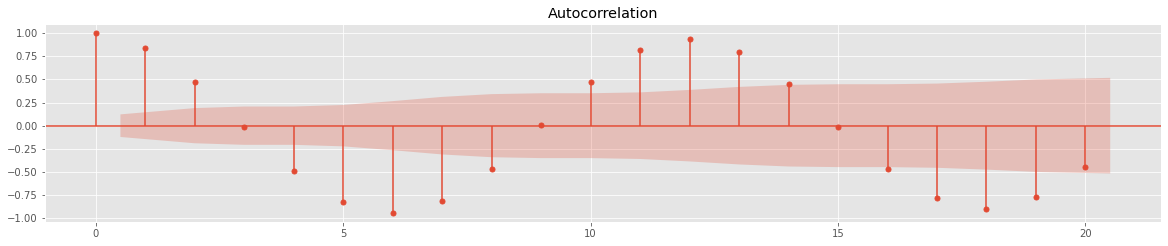

In [10]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)
#plt.plot((1,2,3))
#plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # 0.009543 : 정상성 만족
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.609223
p-value: 0.005587
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [12]:
# ts_diff = ts - ts.shift() # 의미 없다

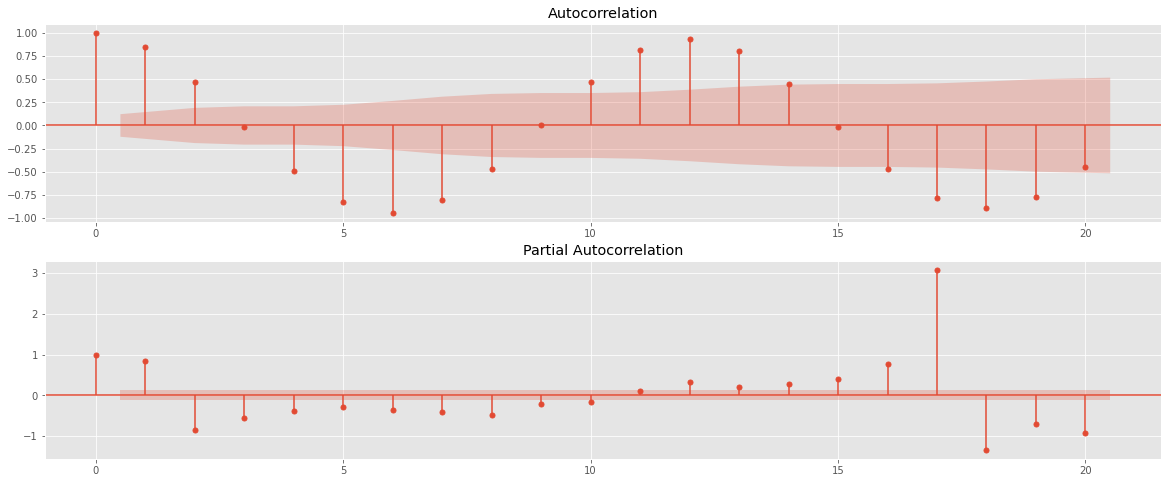

In [13]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts[:], lags=20, ax=ax1) # ax2 = fig.add_subplot(212)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts[:], lags=20, ax=ax2) # lags =40
#plt.plot((1,2,3))
#plt.show()

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(ts, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:               MeanTemp   No. Observations:                  258
Model:                     ARMA(2, 2)   Log Likelihood                -512.213
Method:                       css-mle   S.D. of innovations              1.719
Date:                Tue, 04 Jan 2022   AIC                           1036.427
Time:                        11:18:14   BIC                           1057.745
Sample:                    01-01-2000   HQIC                          1044.999
                         - 06-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9022      0.101    127.426      0.000      12.704      13.101
ar.L1.MeanTemp     1.7321      0.000   6363.766      0.000       1.732       1.733
ar.L2.MeanTemp    -1.0000   7.27e-05

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
start_index = datetime(2018, 1, 1)
end_index = datetime(2021, 6, 1)

forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

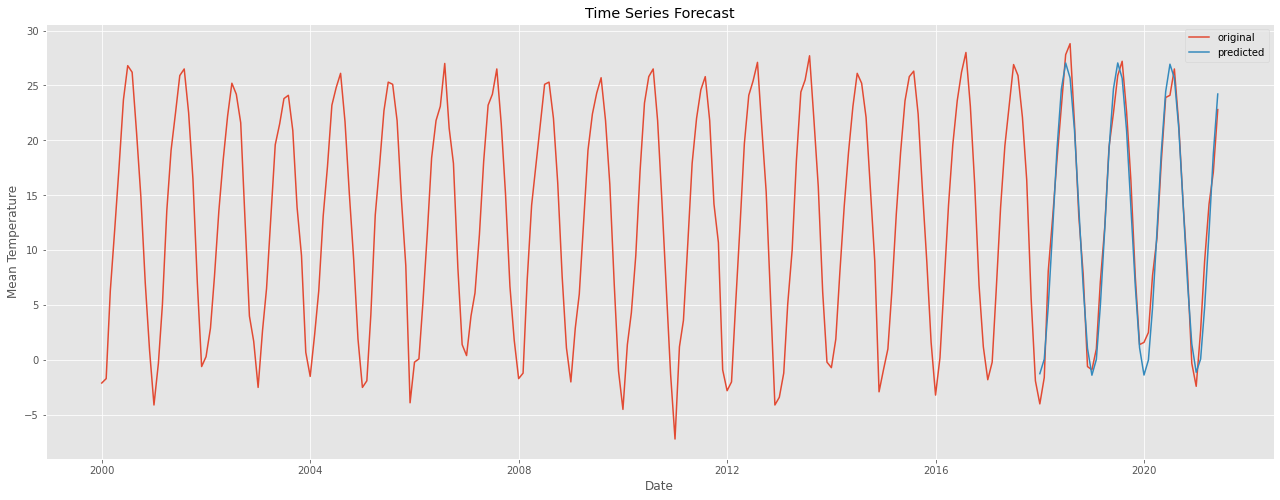

In [16]:
plt.figure(figsize=(22,8))
plt.plot(train_year.trainDate,train_year.MeanTemp, label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [17]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_absolute_percentage_error(y_true, y_pred), 3)
    df = pd.DataFrame({'R2':r2, 'Corr':corr, 'RMSE':rmse, 'MAPE':mape}, index=[0])
    return df

In [18]:
scoring(np.array(train_year[train_year.trainDate >= start_index].MeanTemp), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,96.504,0.984,0.473,47.329


In [19]:
forecast_data = model_fit.forecast(steps=12) # steps 값이 향후 예측하고자하는 값.
print(forecast_data)

(array([26.670117  , 25.47159333, 20.90538674, 14.19498363,  7.13833746,
        1.62613366, -0.86478121,  0.33291925,  4.89826176, 11.60799147,
       18.66433531, 24.17668886]), array([1.71904026, 1.71915193, 1.71918567, 1.71961109, 1.72050578,
       1.72147787, 1.72205841, 1.72216994, 1.72220357, 1.72262809,
       1.72352104, 1.72449135]), array([[23.30086001, 30.039374  ],
       [22.10211746, 28.8410692 ],
       [17.53584475, 24.27492873],
       [10.82460783, 17.56535943],
       [ 3.76620809, 10.51046683],
       [-1.74790097,  5.00016829],
       [-4.23995367,  2.51039125],
       [-3.04247181,  3.7083103 ],
       [ 1.52280479,  8.27371874],
       [ 8.23170245, 14.98428048],
       [15.28629614, 22.04237449],
       [20.79674791, 27.5566298 ]]))


In [20]:
pred_y = forecast_data[0].tolist()
test_y = timeSeries_test.MeanTemp.values

In [21]:
# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []

# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

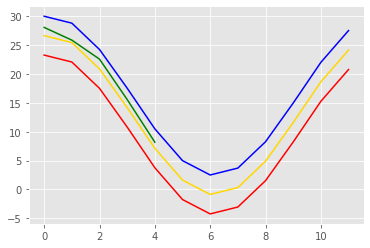

In [22]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [23]:
print(ts_test)

            MeanTemp
trainDate           
2021-07-01      28.1
2021-08-01      25.9
2021-09-01      22.6
2021-10-01      15.6
2021-11-01       8.2
